<h1 align="center">Extracting Stocks Data Using Yahoo finance API</h1>

#

## Step 1: Data Extraction

In [1]:
import pandas as pd
import yfinance as yf

# Step 1: Data Extraction
def extract_stock_data(symbol, start_date, end_date):
    try:
        # Appended '.NS' to the stock symbol to indicate that it is an NSE-listed company.
        stock_data = yf.download(symbol + ".NS", start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"An error occurred while extracting data: {e}")
        return None

# Define the stock symbol, start date, and end date for data extraction
stock_symbol = "RELIANCE"
start_date = "2022-06-23"
end_date = "2023-06-23"

# Extract stock data for the specified symbol and date range
stock_data = extract_stock_data(stock_symbol, start_date, end_date)

stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,2515.050049,2525.000000,2445.000000,2464.949951,2457.551025,8974475
2022-06-24,2480.000000,2511.000000,2468.000000,2500.050049,2492.545654,6571866
2022-06-27,2544.949951,2544.949951,2481.550049,2492.649902,2485.167725,7141493
2022-06-28,2482.100098,2533.949951,2482.100098,2527.699951,2520.112549,6263867
2022-06-29,2507.199951,2597.000000,2501.000000,2580.149902,2572.405029,8863172
...,...,...,...,...,...,...
2023-06-16,2560.199951,2582.399902,2560.199951,2577.399902,2577.399902,11155180
2023-06-19,2584.000000,2584.000000,2542.649902,2551.800049,2551.800049,3137532
2023-06-20,2547.550049,2564.000000,2535.000000,2557.100098,2557.100098,3194085


- We have successfully extracted RELIANCE INDUSTRIES LIMITED stocks data from 23 June 2022 to 22 June 2023.
>

In [2]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-06-23 to 2023-06-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


In [3]:
stock_data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2476.763099,2496.994547,2453.146787,2474.287710,2473.140647,5.942902e+06
std,111.208639,112.324138,111.700941,113.177319,112.980845,3.312945e+06
min,2215.000000,2220.000000,2180.000000,2201.250000,2201.250000,1.555270e+06
25%,2393.375000,2417.437561,2367.525024,2383.474976,2382.737549,3.983152e+06
50%,2475.250000,2499.300049,2457.324951,2475.974976,2475.974976,5.192386e+06
75%,2570.662537,2590.875000,2544.012573,2565.987549,2564.487549,6.983356e+06
90%,2610.090015,2633.000000,2585.300000,2614.345068,2614.345068,9.231045e+06
95%,2646.129968,2662.479919,2618.540063,2644.332532,2642.084509,1.094037e+07
99%,2712.265000,2738.963928,2696.225974,2717.473425,2717.473425,1.558680e+07


## Step 2: Data Processing

In [4]:
# Calculate the average daily trading volume
days = 30  # Number of days to consider for calculating the average
average_volume = stock_data['Volume'].rolling(window=days).mean().iloc[-1]
print(f"Average Daily Trading Volume ({days} days): {average_volume}")

Average Daily Trading Volume (30 days): 4866573.933333334


- we have used the rolling function in pandas with the window parameter set to 30 days. We then called the mean function on the rolling window of the 'Volume' column to calculate the average volume over that period.
>
- The .iloc[-1] indexing is used to get the last value of the rolling mean, which represents the average daily trading volume for the specified period.
>

## Step 3: Data Visualization

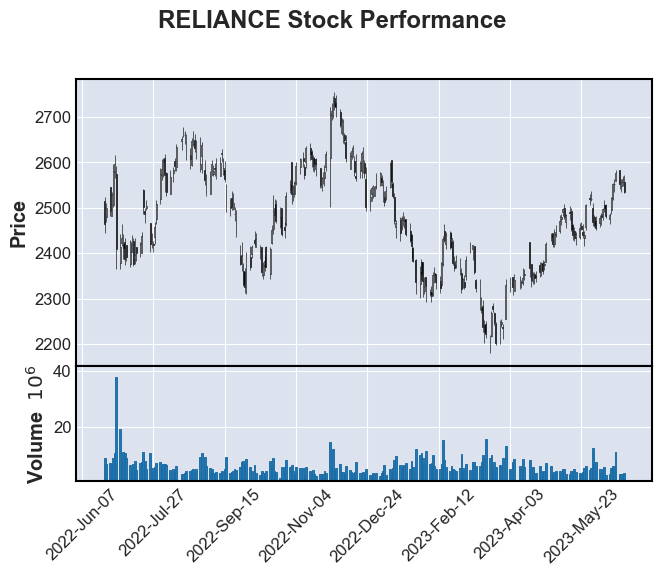

In [5]:
import mplfinance as mpf
# Create a candlestick chart using mplfinance
mpf.plot(stock_data, type='candle', volume=True, show_nontrading=True,
         title=f"{stock_symbol} Stock Performance")

In [6]:
import plotly.graph_objects as go

# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low=stock_data['Low'],
                                     close=stock_data['Close'])])

fig.update_layout(title=f"{stock_symbol} Stock Performance",
                  xaxis_title="Date",
                  yaxis_title="Price")

fig.show()